<a href="https://colab.research.google.com/github/riyashah29/MlExps/blob/main/Experiment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name:Riya Shah    
Roll No.: D085  
SAP ID: 60009230017  
Branch: CSE DS-2-1

Aim:Implement Decision Tree on the given Datasets to build a classifier and Regressor. Apply appropriate pruning method to overcome overfitting.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv("/content/Iris.csv")
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
class node():
  def __init__(self,feature_index=None,threshold=None,left=None,right=None,info_gain=None,value=None):
    self.feature_index=feature_index
    self.threshold=threshold
    self.left=left
    self.right=right
    self.info_gain=info_gain
    self.value=value

#Tree class

In [ ]:
class DecisionTreeClassifier():
  def __init__(self,min_samples_split=2,max_depth=2):
    self.root=None
    self.min_samples_split=min_samples_split
    self.max_depth=max_depth
  def build_tree(self,dataset,curr_depth=0):
    X,Y=dataset[:,:-1],dataset[:,-1]
    num_samples,num_features=np.shape(X)
    if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
      best_split=self.get_best_split(dataset,num_samples,num_features)
      if best_split["info_gain"]>0:
        left_subtree=self.build_tree(best_split["dataset_left"],curr_depth+1)
        right_subtree=self.build_tree(best_split["dataset_right"],curr_depth+1)
        return node(best_split["feature_index"],best_split["threshold"],left_subtree,right_subtree,best_split["info_gain"])
    leaf_value=self.calculate_leaf_value(Y)
    return node(value=leaf_value)
    def get_best_split(self,dataset,num_samples,num_features):
      best_split={}
      max_info_gain=-float("inf")
      for feature_index in range(num_features):
        feature_values=dataset[:,feature_index]
        possible_thresholds=np.unique(feature_values)
        for threshold in possible_thresholds:
          dataset_left,dataset_right=self.split(dataset,feature_index,threshold)
          if len(dataset_left)>0 and len(dataset_right)>0:
            y,left_y,right_y=dataset[:,-1],dataset_left[:,-1],dataset_right[:,-1]
            curr_info_gain=self.information_gain(y,left_y,right_y,"gini")
            if curr_info_gain>max_info_gain:
              best_split["feature_index"]=feature
              best_split["threshold"]=threshold
              best_split["dataset_left"]=dataset_left
              best_split["dataset_right"]=dataset_right
              best_split["info_gain"]=curr_info_gain
              max_info_gain=curr_info_gain
              return best_split


In [ ]:
  def split(self,dataset,feature_index,threshold):
    dataset_left=np.array([row for row in dataset if row[feature_index]<=threshold])
    dataset_right=np.array([row for row in dataset if row[feature_index]>threshold])
    return dataset_left,dataset_right


In [ ]:
def information_gain(self,parent,l_child,r_child,mode="entropy"):
  weight_l=len(l_child)/len(parent)
  weight_r=len(r_child)/len(parent)
  if mode=="entropy":
    gain=-weight_l*entropy(l_child)-weight_r*entropy(r_child)
  else:
    gain=-weight_l*gini_index(l_child)-weight_r*gini_index(r_child)
    return gain


In [ ]:
def entropy(self,y):
  class_labels=np.unique(y)
  entropy=0
  for cls in class_labels:
    p_cls=len(y[y==cls])/len(y)
    entropy += -p_cls*np.log2(p_cls)
    return entropy

def gini_index(self,y):
  class_labels=np.unique(y)
  gini=0
  for cls in class_labels:
    p_cls=len(y[y==cls])/len(y)
    return 1-gini

def calculate_leaf_value(self,Y):
  Y=list(Y)
  return max(Y,key=Y.count)

def print_tree(self,tree=None,indent=" "):
  if not tree:
    tree=self.root
  if tree.value is not None:
    print(tree.value)
  else:
    print("X_"+str(tree.feature_index),"<=",tree.threshold,"?",tree.info_gain)
    print("%sleft:" % (indent),end="")
    self.print_tree(tree.left,indent+indent)
    print("%sright:" % (indent),end="")
    self.print_tree(tree.right,indent+indent)

  def fit(self,X,Y):
    dataset=np.concatenate((X,Y),axis=1)
    self.root=self.build_tree(dataset)

  def predict(self,X):
    predictions=[self.make_prediction(x,self.root) for x in X]
    return predictions

  def make_prediction(self,x,tree):
    if tree.value!=None:
      return tree.value
      feature_val=x[tree.feature_index]
      if feature_val<=tree.threshold:
        return self.make_prediction(x,tree.left)
      else:
        return self.make_prediction(x,tree.right)

In [ ]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)

#Train Test Split



In [ ]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)

#Fit and test the model

In [ ]:
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=3)
classifier.fit(X_train,Y_train)

tree_rules = export_text(classifier, feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
print(tree_rules)

|--- PetalWidthCm <= 2.45
|   |--- class: Iris-setosa
|--- PetalWidthCm >  2.45
|   |--- SepalLengthCm <= 100.50
|   |   |--- class: Iris-versicolor
|   |--- SepalLengthCm >  100.50
|   |   |--- class: Iris-virginica



In [ ]:
Y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

1.0

#Using Scikit learn

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
data2=pd.read_csv("/content/Iris.csv")
data2.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


#Train Test Split

In [ ]:
feature_cols = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X = data2[feature_cols]
y = data2['Species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Fit and predict

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [ ]:
y_pred = clf.predict(X_test)

#Evaluation

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


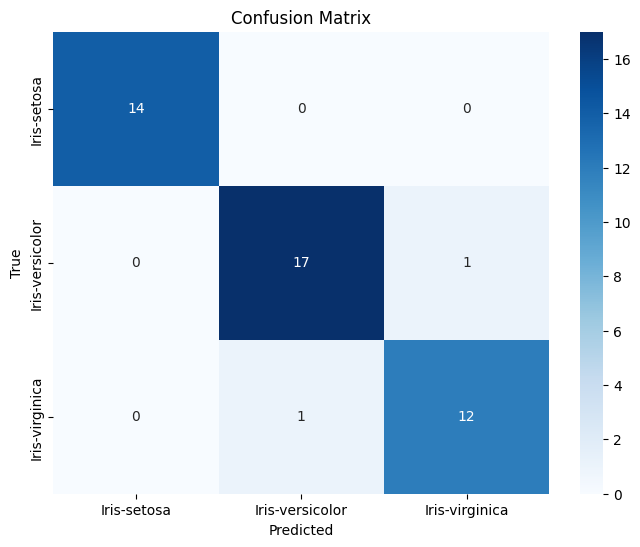

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data2['Species'].unique(), yticklabels=data2['Species'].unique())

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
!apt-get install -y graphviz
!pip install graphviz pydotplus

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

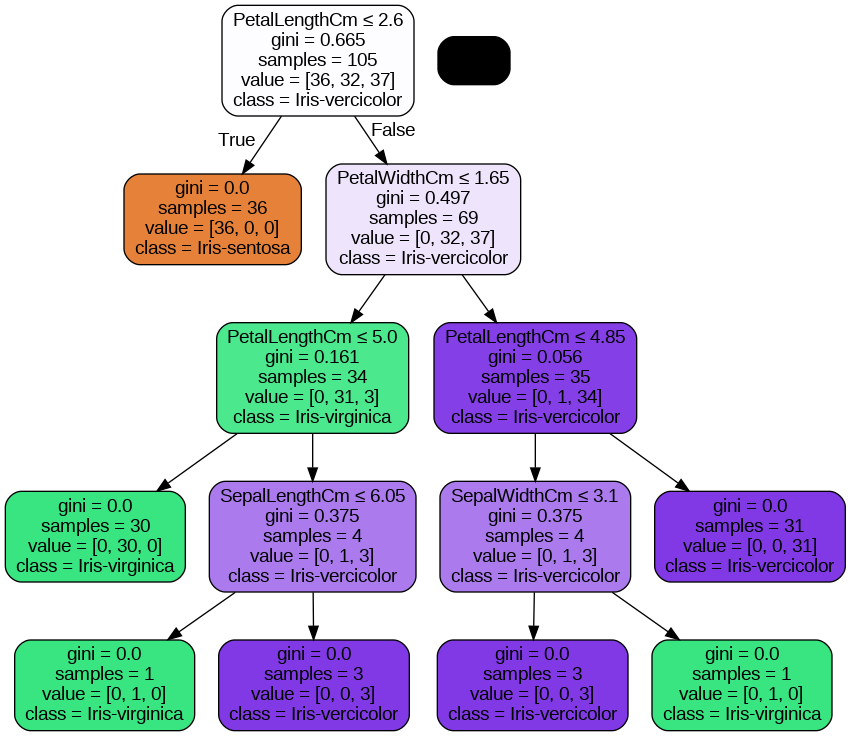

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Iris-sentosa','Iris-virginica', 'Iris-vercicolor'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('iris.png')
Image(graph.create_png())

#Overfitting

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)

print(X.shape, y.shape)

(10000, 20) (10000,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
train_scores, test_scores = list(), list()

values = [i for i in range(1, 21)]

In [ ]:
for i in values:

	model = DecisionTreeClassifier(max_depth=i)

	model.fit(X_train, y_train)

	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)

	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)

	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.764, test: 0.766
>2, train: 0.802, test: 0.801
>3, train: 0.877, test: 0.871
>4, train: 0.899, test: 0.886
>5, train: 0.903, test: 0.890
>6, train: 0.922, test: 0.910
>7, train: 0.941, test: 0.925
>8, train: 0.950, test: 0.922
>9, train: 0.957, test: 0.921
>10, train: 0.965, test: 0.920
>11, train: 0.972, test: 0.921
>12, train: 0.979, test: 0.918
>13, train: 0.983, test: 0.915
>14, train: 0.988, test: 0.905
>15, train: 0.991, test: 0.911
>16, train: 0.993, test: 0.910
>17, train: 0.995, test: 0.910
>18, train: 0.996, test: 0.907
>19, train: 0.997, test: 0.905
>20, train: 0.998, test: 0.902


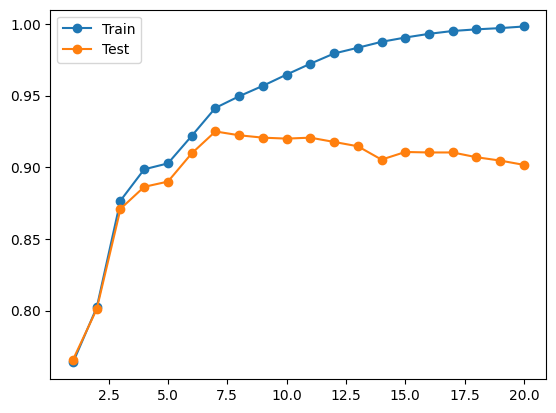

In [ ]:
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

deep_tree = DecisionTreeClassifier(max_depth=None)
deep_tree.fit(X_train, y_train)
print("Deep Tree Accuracy:", deep_tree.score(X_test, y_test))

pruned_tree = DecisionTreeClassifier(max_depth=3)
pruned_tree.fit(X_train, y_train)
print("Pruned Tree Accuracy:", pruned_tree.score(X_test, y_test))

Deep Tree Accuracy: 0.909
Pruned Tree Accuracy: 0.871


#Car Prediction dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("/content/CarPrediction.csv")

In [ ]:
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R² Score: {r2_score(y_test, y_pred)}")


MAE: 0.1419715166093759
RMSE: 0.27380544448482796
R² Score: 0.7001223142818631


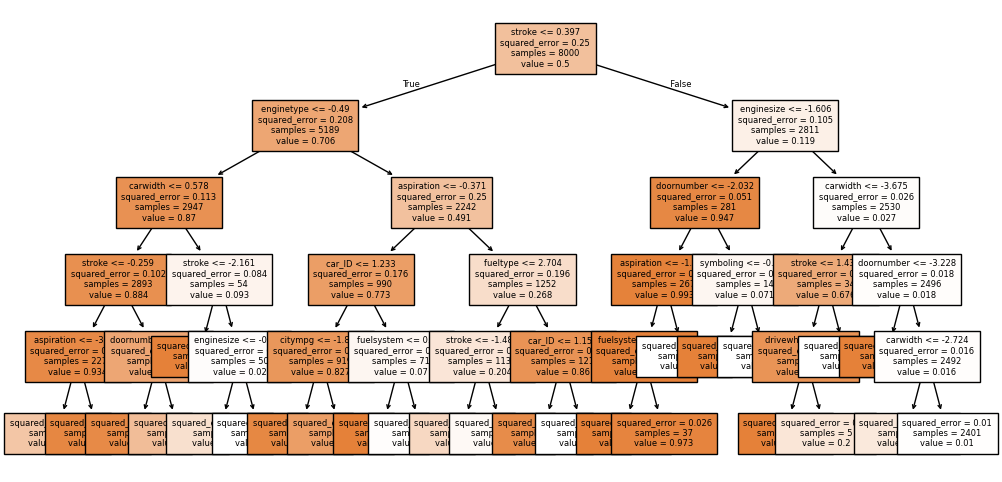

In [ ]:
import pandas as pd

X = pd.DataFrame(X, columns=['car_ID', 'symboling', 'fueltype', 'aspiration',
                             'doornumber', 'carbody', 'drivewheel', 'wheelbase',
                             'carlength', 'carwidth', 'carheight', 'curbweight',
                             'enginetype', 'enginesize', 'fuelsystem', 'boreratio',
                             'stroke', 'horsepower', 'citympg', 'highwaympg'])
plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=X.columns, filled=True, fontsize=6)
plt.show()


collab link:https://colab.research.google.com/drive/1lzP-ScRvhsMNPl_puqkJZXy127xn1FEi?usp=sharing